In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [3]:
data=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")

In [7]:
df=data[(data['label']==0) | (data['label']==4) | (data['label']==12) | (data['label']==18)]

In [8]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10,18,133,135,141,146,150,155,158,159,163,...,99,96,96,97,96,95,94,94,93,92
20,18,149,150,150,150,150,151,151,151,151,...,46,4,69,183,167,167,167,164,162,161
27,18,138,141,143,147,149,150,150,151,154,...,175,175,176,177,178,178,177,177,178,178
31,12,148,151,157,164,170,173,175,179,182,...,184,213,195,226,225,197,179,113,130,124
35,12,147,149,151,153,155,157,158,158,161,...,163,157,146,128,94,84,192,193,191,189


In [10]:
df['label'].unique()

array([18, 12,  4,  0])

In [11]:
df.shape

(4337, 785)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

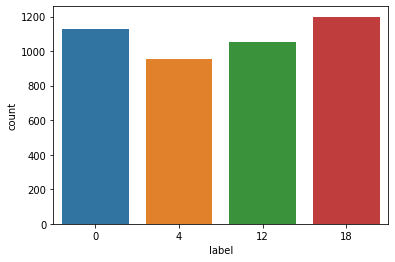

In [12]:
import seaborn as sns
sns.countplot('label',data=df)

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop('label',axis=1)
y=df['label']
x_train, x_valid, y_train, y_valid = train_test_split( x, y, test_size=0.2, random_state=42)
x_train.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1458,156,160,164,167,171,172,174,177,178,179,...,96,201,213,213,214,214,214,213,212,210
5963,196,199,202,205,207,209,212,213,214,215,...,193,255,247,249,250,251,251,252,252,252
12917,142,144,146,147,148,150,152,154,156,157,...,178,179,180,181,181,181,181,181,182,183
6351,124,126,128,130,133,136,138,141,143,145,...,114,114,102,99,80,123,181,172,174,174
26903,135,137,139,140,141,143,146,145,148,150,...,0,128,188,175,177,177,176,176,174,173


In [14]:
x_valid.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
25259,146,151,154,155,159,162,165,168,168,171,...,64,233,226,235,234,233,234,235,234,234
9271,155,153,153,154,155,155,154,156,156,156,...,213,210,210,210,210,208,205,205,204,204
16816,91,103,115,122,129,134,138,140,143,145,...,189,192,194,195,195,196,196,196,196,196
97,147,156,159,164,171,179,186,193,200,206,...,136,97,78,79,65,33,56,28,29,54
10475,134,138,147,157,165,170,173,178,183,188,...,186,228,202,247,245,204,178,81,107,98


In [15]:
y_train


1458     18
5963     12
12917     0
6351     12
26903    12
         ..
21850    12
2845      4
19470    18
23802    18
5347      0
Name: label, Length: 3469, dtype: int64

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
y_train=label_binarizer.fit_transform(y_train)
y_valid=label_binarizer.transform(y_valid)

In [17]:

x_train=x_train/255
x_valid=x_valid/255

In [18]:
x_train=x_train.values
x_train=x_train.reshape(-1,28,28,1)

In [19]:

x_valid=x_valid.values
x_valid=x_valid.reshape(-1,28,28,1)

In [21]:
import matplotlib.pyplot as plt

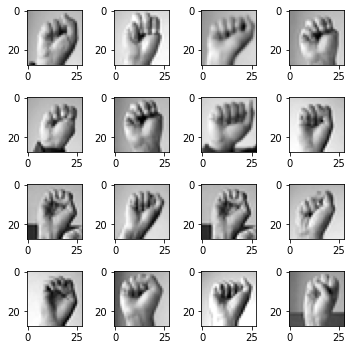

In [23]:
f, ax = plt.subplots(4,4) 
f.set_size_inches(5, 5)
k=0
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
#         ax[i,j].title.set_text(df['label'][k])
        k += 1
    plt.tight_layout()

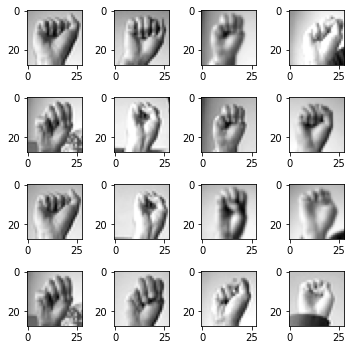

In [24]:

f, ax = plt.subplots(4,4) 
f.set_size_inches(5, 5)
k=0
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_valid[k].reshape(28, 28) , cmap = "gray")
#         ax[i,j].title.set_text(df['label'][k])
        k += 1
    plt.tight_layout()

In [25]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [26]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(128,activation = 'relu'))

model.add(Dense(4, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )


In [28]:
history = model.fit(x_train,y_train, batch_size = 16 ,epochs = 10 , validation_data = (x_valid, y_valid) )


Epoch 1/10
217/217 [==============================] - 1s 6ms/step - loss: 2.3328e-04 - accuracy: 1.0000 - val_loss: 2.1196e-04 - val_accuracy: 1.0000
Epoch 2/10
217/217 [==============================] - 1s 4ms/step - loss: 2.0613e-04 - accuracy: 1.0000 - val_loss: 1.6636e-04 - val_accuracy: 1.0000
Epoch 3/10
217/217 [==============================] - 1s 5ms/step - loss: 2.1730e-04 - accuracy: 1.0000 - val_loss: 1.4784e-04 - val_accuracy: 1.0000
Epoch 4/10
217/217 [==============================] - 1s 4ms/step - loss: 1.4758e-04 - accuracy: 1.0000 - val_loss: 1.1916e-04 - val_accuracy: 1.0000
Epoch 5/10
217/217 [==============================] - 1s 4ms/step - loss: 1.4077e-04 - accuracy: 1.0000 - val_loss: 9.3919e-05 - val_accuracy: 1.0000
Epoch 6/10
217/217 [==============================] - 1s 4ms/step - loss: 1.0567e-04 - accuracy: 1.0000 - val_loss: 8.2227e-05 - val_accuracy: 1.0000
Epoch 7/10
217/217 [==============================] - 1s 4ms/step - loss: 9.6811e-05 - accuracy: 1.0

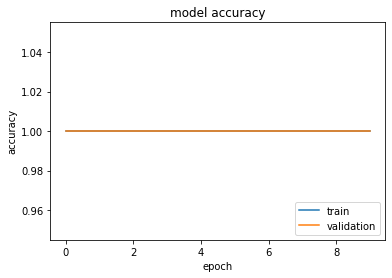

In [29]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

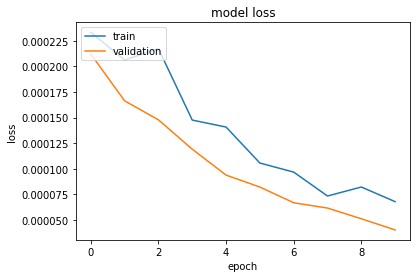

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [108]:
test=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")


In [116]:
y_test=test['label']
x_test=test.drop('label',axis=1)
x_test=x_test.values
x_test=x_test.reshape(-1,28,28,1)


In [117]:
import keras

In [118]:
model2=keras.models.load_model("../input/model-sign-language/sign_language_prediction_model.h5")

In [119]:
dic={0:0,1:4,2:12,3:18}

In [139]:
def model_pred(data,new_model):
#     img = image.load_img(filename,target_size = (28,28),color_mode = "grayscale")
    img = np.array(data)/255
#     img = np.expand_dims(img,axis = 0) 
    img = img.reshape(1,28,28,1)
    result = new_model.predict(img)
#     print(result)
#     print("len",len(result[0]))
    result=np.argmax(result)
#     print(result)
#     img_index = result.index(max(result))
#     print(result)
#     if result>=9:
#         result=result+1
    return dic[result]

In [140]:
def model2_pred(data,new_model):
#     img = image.load_img(filename,target_size = (28,28),color_mode = "grayscale")
    img = np.array(data)/255
#     img = np.expand_dims(img,axis = 0) 
    img = img.reshape(1,28,28,1)
    result = new_model.predict(img)
#     print(result)
#     print("len",len(result[0]))
    result=np.argmax(result)
#     print(result)
#     img_index = result.index(max(result))
#     print(result)
    if result>=9:
        result=result+1
    return result

In [141]:
# x_train[0]

In [142]:
lst=[]
for x in x_test:
    prediction=model2_pred(x,model2)
    if prediction ==0 or prediction==4 or prediction ==12 or prediction ==18 :
#         print(prediction)
        prediction=model_pred(x,model)
    lst.append(prediction)

In [148]:
lst[10:20]

[8, 8, 21, 12, 7, 4, 22, 0, 7, 7]

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lst)

0.9392080312325711

In [146]:
from sklearn.metrics import classification_report
print (classification_report(y_test,lst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       0.99      1.00      0.99       310
           3       0.94      1.00      0.97       245
           4       0.95      0.96      0.96       498
           5       1.00      1.00      1.00       247
           6       0.95      0.92      0.94       348
           7       0.97      1.00      0.98       436
           8       0.88      0.86      0.87       288
          10       1.00      0.93      0.96       331
          11       0.87      1.00      0.93       209
          12       0.95      0.90      0.93       394
          13       0.99      0.93      0.96       291
          14       1.00      0.98      0.99       246
          15       1.00      0.99      1.00       347
          16       0.98      1.00      0.99       164
          17       0.75      0.64      0.69       144
          18       0.76    

In [149]:
y_test[10:20]

10     8
11     8
12    21
13    12
14     7
15     4
16    22
17     0
18     7
19     7
Name: label, dtype: int64

In [150]:
model.save("second_model.h5")